In [ ]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, GridSearchCV
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score, fbeta_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_recall_curve
from collections import Counter
from imblearn.pipeline import Pipeline
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from imblearn.metrics import classification_report_imbalanced
from joblib import dump, load


In [ ]:
from google.colab import files

uploaded = files.upload()


Saving creditcard.csv to creditcard.csv


In [88]:
df = pd.read_csv('creditcard.csv')

In [85]:
# understanding the dataset

df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,1.783274,-0.994983
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.269825,-0.994983
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,4.983721,-0.994972
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,1.418291,-0.994972
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,0.670579,-0.994960


In [ ]:
df.shape

(284807, 31)

In [ ]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [90]:
df_mean = df["Amount"].mean()
df_median = df["Amount"].median()
df_max = df["Amount"].max()
df_min = df["Amount"].min()
print(f"mean = {df_mean:.2f}")
print(f' median = {df_median:.2f}')
print(f' max = {df_max:.2f}')
print(f' min = {df_min:.2f}')


mean = 88.35
 median = 22.00
 max = 25691.16
 min = 0.00


In [91]:
non_fraudulent = df['Class'].value_counts()[0]
fraudulent = df['Class'].value_counts()[1]
print('Non-fraudulent transactions:', non_fraudulent)
print('Fraudulent transactions:', fraudulent)


Non-fraudulent transactions: 284315
Fraudulent transactions: 492


In [ ]:
total = len(df)
print('Percentage of non-fraudulent:', round(non_fraudulent / total, 5))
print('Percentage of fraudulent:', round(fraudulent / total, 5))

Percentage of non-fraudulent: 0.99827
Percentage of fraudulent: 0.00173


In [92]:
# Scaling the 'Amount' and 'Time' columns to account for differing data ranges
df['scaled_amount'] = RobustScaler().fit_transform(df[['Amount']])
df['scaled_time'] = RobustScaler().fit_transform(df[['Time']])

df.drop(columns=['Amount', 'Time'], inplace=True)


In [ ]:
# defining the features (X) and target (y)
X = df.drop('Class', axis=1)
y = df['Class']

In [ ]:
# splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=37, stratify=y)


In [ ]:
# combining the training data
df_train = pd.concat([X_train, y_train], axis=1)

In [ ]:
# performing undersampling
fraud_train = df_train[df_train['Class'] == 1]
non_fraud_train = df_train[df_train['Class'] == 0].sample(len(fraud_train), random_state=37)

In [ ]:
# creating a new training data and shuffling
balanced_train = pd.concat([fraud_train, non_fraud_train]).sample(frac=1, random_state=37)

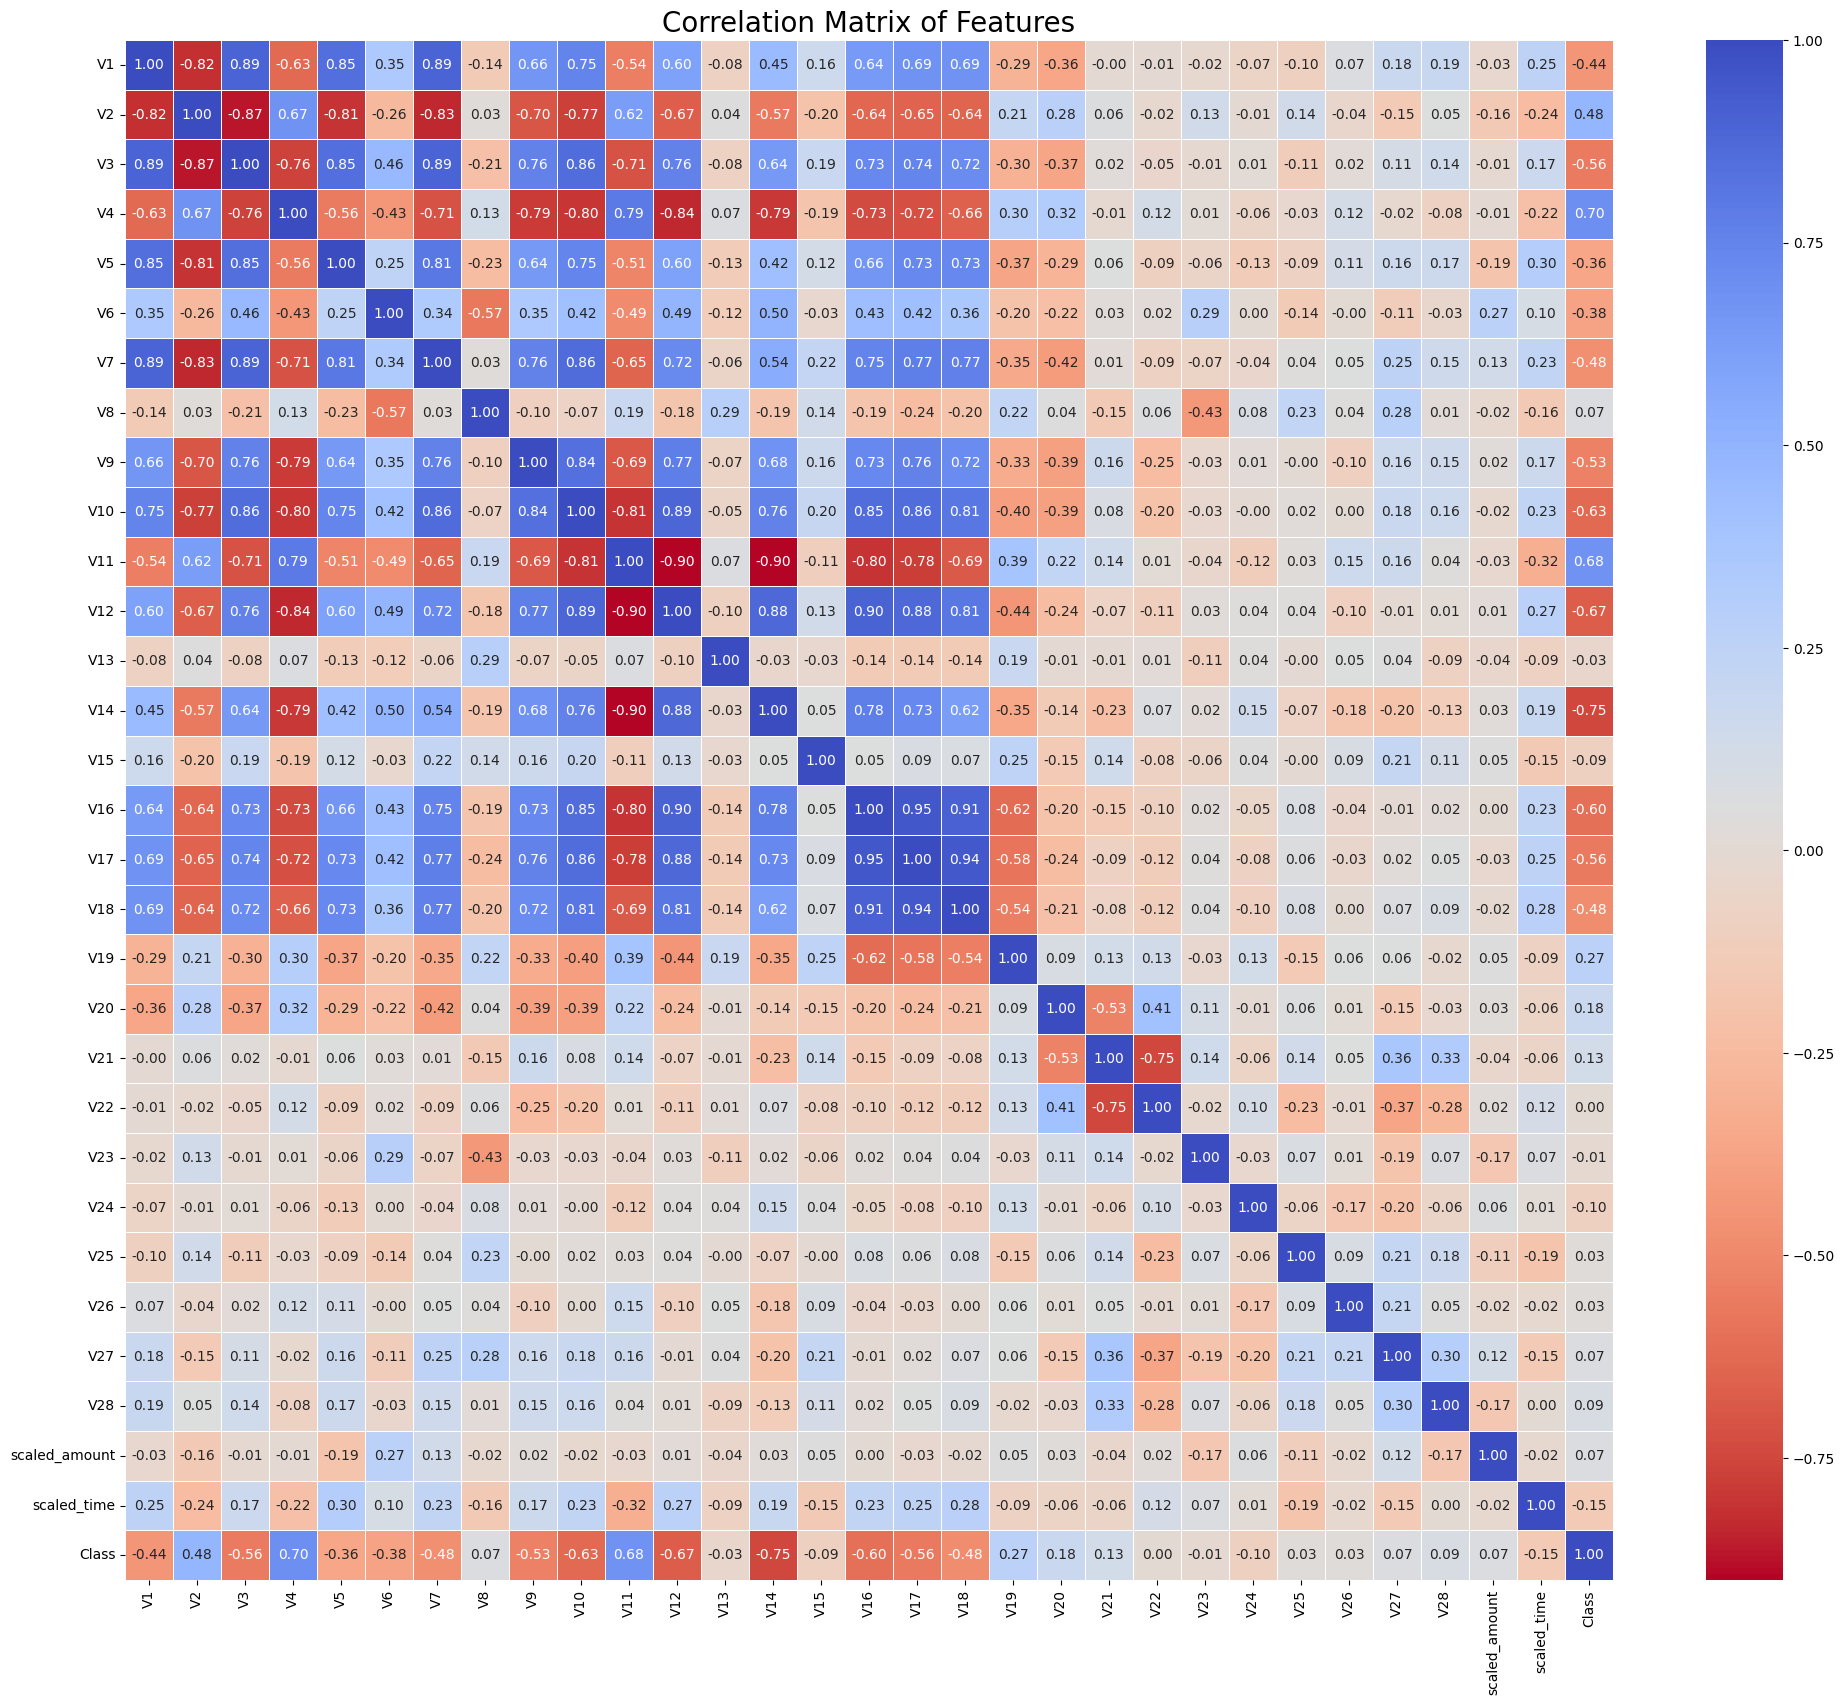

Features with strong positive correlation with 'Class' (> 0.6):
['V4', 'V11']
Features with strong negative correlation with 'Class' (< -0.6):
['V10', 'V12', 'V14']


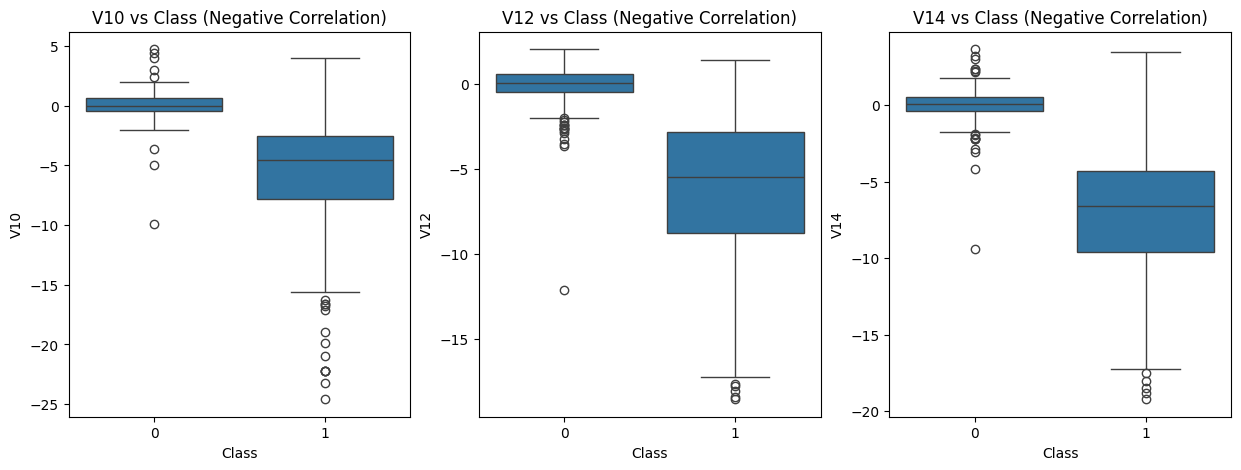

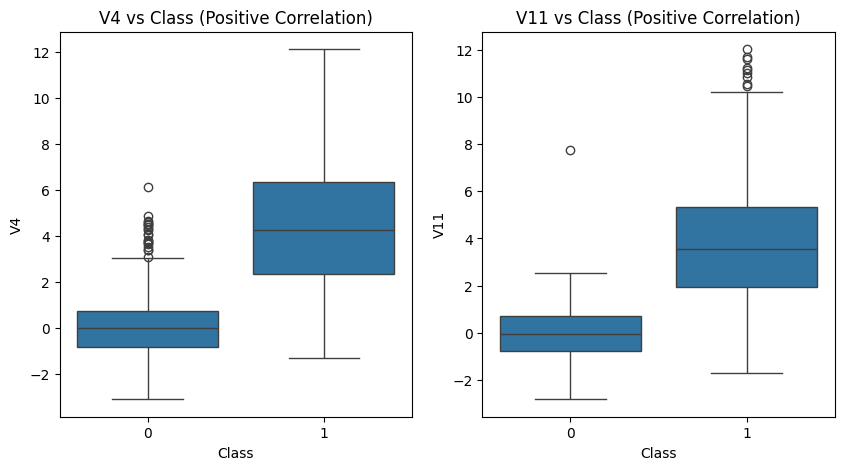

In [ ]:
# creating and visualising corelation matrix
correlation_matrix = balanced_train.corr(method='pearson')
plt.figure(figsize=(24, 20))
sns.heatmap(correlation_matrix, cmap='coolwarm_r', annot=True, fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Features', fontsize=20)
plt.show()

high_positive_corr = [feature for feature in correlation_matrix.columns
                      if feature != 'Class' and correlation_matrix.loc[feature, 'Class'] > 0.6]

print("Features with strong positive correlation with 'Class' (> 0.6):")
print(high_positive_corr)

high_negative_corr = [feature for feature in correlation_matrix.columns
                      if feature != 'Class' and correlation_matrix.loc[feature, 'Class'] < -0.6]

print("Features with strong negative correlation with 'Class' (< -0.6):")
print(high_negative_corr)

f, axes = plt.subplots(ncols=3, figsize=(15, 5))

for i, feature in enumerate(high_negative_corr[:3]):  # Limit to 3 features for display
    sns.boxplot(x='Class', y=feature, data=balanced_train, ax=axes[i])
    axes[i].set_title(f'{feature} vs Class (Negative Correlation)')

plt.show()

f, axes = plt.subplots(ncols=2, figsize=(10, 5))

for i, feature in enumerate(high_positive_corr[:2]):  # Limit to 2 features for display
    sns.boxplot(x='Class', y=feature, data=balanced_train, ax=axes[i])
    axes[i].set_title(f'{feature} vs Class (Positive Correlation)')

plt.show()

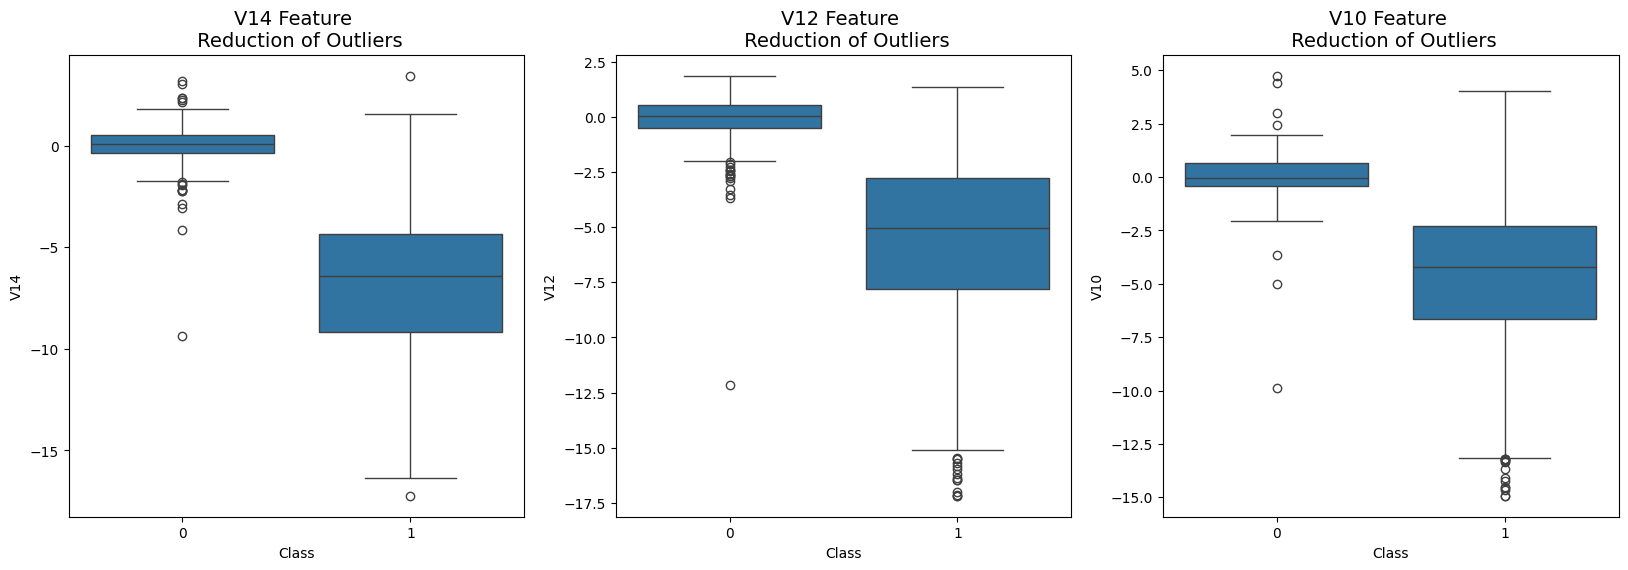

In [ ]:
# function to remove outliers using IQR method
def remove_outliers(df, feature):
    fraud_data = df[feature].loc[df['Class'] == 1].values
    q25, q75 = np.percentile(fraud_data, 25), np.percentile(fraud_data, 75)
    iqr = q75 - q25

    cut_off = iqr * 1.5
    lower, upper = q25 - cut_off, q75 + cut_off

    df_cleaned = df[(df[feature] >= lower) & (df[feature] <= upper)]

    return df_cleaned

# apply outlier removal to the balanced_train dataset
balanced_train = remove_outliers(balanced_train, 'V14')
balanced_train = remove_outliers(balanced_train, 'V12')
balanced_train = remove_outliers(balanced_train, 'V10')

# plotting the boxplots after removing outliers
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 6))

# boxplots for V14, V12, and V10
sns.boxplot(x="Class", y="V14", data=balanced_train, ax=ax1)
ax1.set_title("V14 Feature \n Reduction of Outliers", fontsize=14)

sns.boxplot(x="Class", y="V12", data=balanced_train, ax=ax2)
ax2.set_title("V12 Feature \n Reduction of Outliers", fontsize=14)

sns.boxplot(x="Class", y="V10", data=balanced_train, ax=ax3)
ax3.set_title("V10 Feature \n Reduction of Outliers", fontsize=14)

plt.show()


In [ ]:
### model comparison
classifiers = [
    XGBClassifier(eval_metric='logloss'),  # Use XGBoost Classifier without use_label_encoder
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1, random_state=37),
    KNeighborsClassifier(3),
]

precision_scorer = make_scorer(precision_score, average='weighted')
recall_scorer = make_scorer(recall_score, average='weighted')
f1_scorer = make_scorer(f1_score, average='weighted')
f2_scorer = make_scorer(fbeta_score, beta=2)

scoring_methods = {
    "precision": precision_scorer,
    "recall": recall_scorer,
    "f1": f1_scorer,
    "f2": f2_scorer
}

X_subsampling = balanced_train.drop('Class', axis=1)
y_subsampling = balanced_train['Class']

results_cv_sk = [[] for _ in range(len(classifiers))]

# Cross-validation for each classifier
for i, clf in enumerate(classifiers):
    for scoring_name, scoring in scoring_methods.items():
        # Cross-validation
        scores = cross_val_score(clf, X_subsampling, y_subsampling,
                                 cv=StratifiedKFold(n_splits=5, random_state=37, shuffle=True), scoring=scoring)
        results_cv_sk[i].append(scores)

# Classifiers performance
avg_scores = []

for i, clf_results in enumerate(results_cv_sk):
    clf_name = classifiers[i].__class__.__name__
    print(f"Results for classifier: {clf_name}")

    avg_clf_scores = {}
    for j, score_set in enumerate(clf_results):
        sc_np = np.array(score_set)
        mean_score = np.mean(sc_np)

        scoring_key = list(scoring_methods.keys())[j]
        avg_clf_scores[scoring_key] = mean_score

        print(f"Scoring method {list(scoring_methods.keys())[j]}: Mean = {mean_score}")
    avg_scores.append((clf_name, avg_clf_scores))

# Classifier comparison
best_classifier = None
best_score = -np.inf

print("\nSummary of classifier performances:")
for clf_name, scores in avg_scores:
    avg_performance = np.mean(list(scores.values()))
    print(f"{clf_name}: Average performance across metrics = {avg_performance}")

    if avg_performance > best_score:
        best_score = avg_performance
        best_classifier = clf_name

print(f"\nBest classifier for validation set: {best_classifier} with an average score of {best_score}")


Results for classifier: XGBClassifier
Scoring method precision: Mean = 0.9419932244013687
Scoring method recall: Mean = 0.9405629139072846
Scoring method f1: Mean = 0.9404524109540258
Scoring method f2: Mean = 0.919970935338361
Results for classifier: RandomForestClassifier
Scoring method precision: Mean = 0.9174975827163626
Scoring method recall: Mean = 0.9128354827466015
Scoring method f1: Mean = 0.9124125152418093
Scoring method f2: Mean = 0.8735996607806136
Results for classifier: KNeighborsClassifier
Scoring method precision: Mean = 0.9422826961900672
Scoring method recall: Mean = 0.9405454862321367
Scoring method f1: Mean = 0.9404111026956956
Scoring method f2: Mean = 0.9181693085147522

Summary of classifier performances:
XGBClassifier: Average performance across metrics = 0.9357448711502601
RandomForestClassifier: Average performance across metrics = 0.9040863103713468
KNeighborsClassifier: Average performance across metrics = 0.9353521484081629

Best classifier for validation 

Model XGBClassifier saved as ./model_XGBClassifier_undersampling.joblib
Precision (weighted): 0.9982
Recall (weighted): 0.9632
F1 Score (weighted): 0.9797
F2 Score (weighted): 0.9690


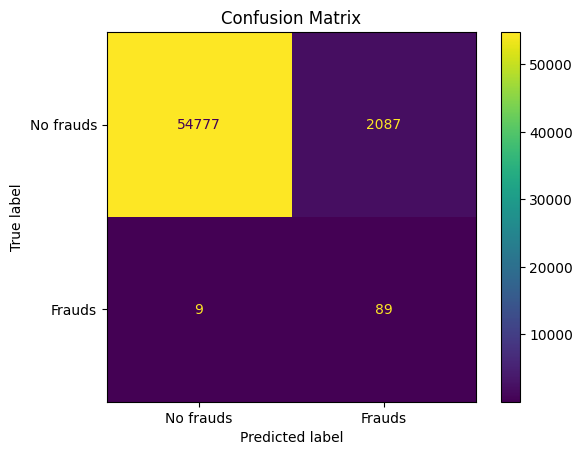

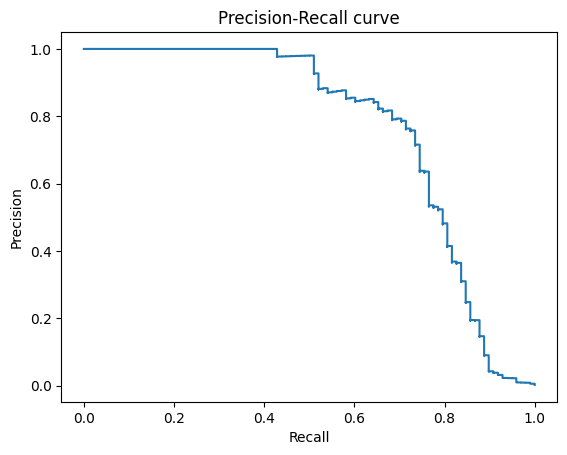

In [81]:
# Training and saving the best classifier with joblib
best_clf = None

for clf in classifiers:
    if clf.__class__.__name__ == best_classifier:
        best_clf = clf
        break

if best_clf is None:
    raise ValueError(f"Classifier {best_classifier} not found.")

best_clf.fit(X_subsampling, y_subsampling)

# Saving the model
model_filename = f'./model_{best_clf.__class__.__name__}_undersampling.joblib'
dump(best_clf, model_filename)
print(f"Model {best_clf.__class__.__name__} saved as {model_filename}")

# Final test (with previous test dataset taken from original dataframe)
best_clf = load(model_filename)

# Predictions
predictions = best_clf.predict(X_test)

# Calculating performance metrics
precision = precision_score(y_test, predictions, average='weighted')
recall = recall_score(y_test, predictions, average='weighted')
f1 = f1_score(y_test, predictions, average='weighted')
f2 = fbeta_score(y_test, predictions, average='weighted', beta=2)

print(f"Precision (weighted): {precision:.4f}")
print(f"Recall (weighted): {recall:.4f}")
print(f"F1 Score (weighted): {f1:.4f}")
print(f"F2 Score (weighted): {f2:.4f}")

# Confusion Matrix
cm = confusion_matrix(y_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No frauds", "Frauds"])
disp.plot()
plt.title(f"Confusion Matrix")
plt.show()

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, best_clf.predict_proba(X_test)[:, 1])
plt.step(recall, precision, where='post')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title(f'Precision-Recall curve')
plt.show()
